Challenge 1

Fit a model to your data. Now you know the coefficients (the beta values). Write a python function to simulate outcomes. (The sigma of the normal noise distribution will be the std deviation of the residuals.) For the same observed input variables, simulate the outcome. Plot the observed data and the simulated data.

Challenge 2

Generate (fake) data that is linearly related to log(x). Basically write an underlying model just like in challenge 1, but instead of a fitted model, you are making this model up. It is of the form B0 + B1log(x) + epsilon. You are making up the parameters. Simulate some data from this model. Then fit two models to it: a) quadratic [second degree polynomial] b) logarithmic log(x)

Challenge 3

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set. (You can use sklearn.metrics.mean_squared_error.)

Challenge 4

For one continuous feature (like budget, choose one that strongly affects the outcome), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared
AIC

Challenge 5

Fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [208]:
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline
import pandas as pd
import pickle
with open("final_dataframe_boxofficemojo.pkl", 'r') as picklefile1: 
    df = pickle.load(picklefile1)

In [16]:
# Challenge 1
# Fit a model to your data. Now you know the coefficients 
# (the beta values). Write a python function to simulate outcomes. 
# (The sigma of the normal noise distribution will be the std deviation 
#  of the residuals.) For the same observed input variables, simulate 
# the outcome. Plot the observed data and the simulated data.

model = smf.ols(formula='DomesticTotalGross ~ NumMovies + CareerLength', data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     498.3
Date:                Sun, 26 Apr 2015   Prob (F-statistic):          9.27e-137
Time:                        19:10:15   Log-Likelihood:                -5537.7
No. Observations:                 726   AIC:                         1.108e+04
Df Residuals:                     723   BIC:                         1.110e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       91.2907     32.816      2.782      0.006        26.864   155.717
NumMovies       45.7024      1.704     26.815      0.000        42.356    49.048
CareerLength    -1.6583      1.343     -1.235      0.217        -4.294     0.978
==============================================================================
Omnibus:                      173.044   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.372
Skew:                           1.244   Prob(JB):                     2.34e-91
Kurtosis:                       5.759   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
print model.params

print model.tvalues

Intercept       91.290730
NumMovies       45.702365
CareerLength    -1.658310
dtype: float64
Intercept        2.781878
NumMovies       26.814914
CareerLength    -1.235072
dtype: float64


In [75]:
#Standard deviation of residuals as error function
def simoutcomes(model,df):
    newoutcome = model.params[0] + model.params[1] * df['NumMovies'] + model.params[2] * df['CareerLength'] + np.random.normal(loc=0.0, scale=model.resid.std(0))   
    return newoutcome
                                                                                                                               

In [81]:
newoutcome = simoutcomes(model,df)

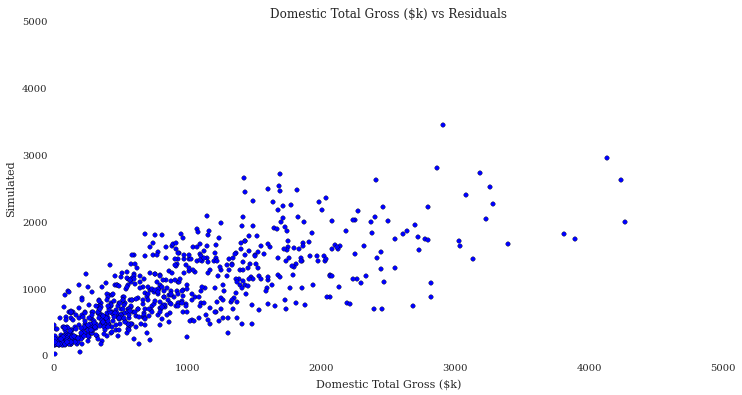

In [233]:
plt.scatter(df['DomesticTotalGross'].values, newoutcome)
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 18
title('Domestic Total Gross ($k) vs Residuals')
xlabel('Domestic Total Gross ($k)')
ylabel('Simulated')
plt.show()

In [228]:
# Challenge 2
# Generate (fake) data that is linearly related to log(x). 
# Basically write an underlying model just like in challenge 1, 
# but instead of a fitted model, you are making this model up. 
# It is of the form B0 + B1log(x) + epsilon. You are making up 
# the parameters. Simulate some data from this model. Then fit two 
# models to it: a) quadratic [second degree polynomial] b) logarithmic log(x)

def simoutcomes2(df):
    newoutcome2 = -56 + 85 * log(df['DomesticTotalGross']) + np.random.normal(loc=0.0, scale=250)   
    return newoutcome2

In [229]:
newoutcome2 = simoutcomes2(df)
df['DTGsq'] = df['DomesticTotalGross']**2
df['Ones'] = 1
columns = ['DomesticTotalGross','Ones','DTGsq']
dfnew = pd.DataFrame(df, columns=columns)


In [216]:
newoutcome2.head()

24     484.709699
63     493.752639
86     424.260154
90     268.477803
114    434.853388
Name: DomesticTotalGross, dtype: float64

In [230]:
# Fit to quadratic
quadmod = smf.OLS(newoutcome2, dfnew).fit()
quadmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1790.
Date:                Mon, 27 Apr 2015   Prob (F-statistic):          9.03e-281
Time:                        12:21:28   Log-Likelihood:                -3744.7
No. Observations:                 726   AIC:                             7495.
Df Residuals:                     723   BIC:                             7509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
DomesticTotalGross     0.2413      0.005     44.387      0.000         0.231     0.252
Ones                 508.8219      3.119    163.127      0.000       502.698   514.946
DTGsq              -4.755e-05   1.82e-06    -26.081      0.000     -5.11e-05  -4.4e-05
==============================================================================
Omnibus:                      473.829   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7837.683
Skew:                          -2.669   Prob(JB):                         0.00
Kurtosis:                      18.186   Cond. No.                     5.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [231]:
# Fit to log(x)

dfnew2 = pd.DataFrame()

dfnew2['LogDTG'] = log(df['DomesticTotalGross'])
dfnew2['Ones'] = 1

logmod = smf.OLS(newoutcome2,dfnew2).fit()
logmod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.541e+32
Date:                Mon, 27 Apr 2015   Prob (F-statistic):               0.00
Time:                        12:21:36   Log-Likelihood:                 20121.
No. Observations:                 726   AIC:                        -4.024e+04
Df Residuals:                     724   BIC:                        -4.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
LogDTG        85.0000   6.85e-15   1.24e+16      0.000        85.000    85.000
Ones         123.5942   4.39e-14   2.81e+15      0.000       123.594   123.594
==============================================================================
Omnibus:                       59.726   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.389
Skew:                          -0.084   Prob(JB):                     3.74e-05
Kurtosis:                       2.197   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# Challenge 3
# Fit a model to your training set. Calculate mean squared error on your training set. 
# Then calculate it on your test set. (You can use sklearn.metrics.mean_squared_error.)
columns = ['DomesticTotalGross']
dfnew = pd.DataFrame(df['DomesticTotalGross'], columns=columns)
dfnew['NewOutcome'] = newoutcome                    
msk = np.random.rand(len(dfnew)) < 0.75
train = dfnew[msk]
test = dfnew[~msk]

In [226]:
x = log(train['DomesticTotalGross'])
y = train['NewOutcome']

logmodtrain = smf.OLS(y,x).fit()

sqerr = logmodtrain.resid **2
print "Training Set Mean Squared Error: ", sqerr.mean()

Training Set Mean Squared Error:  217746.771704


In [227]:
x = log(test['DomesticTotalGross'])
y = test['NewOutcome']

logmodtest = smf.OLS(y,x).fit()

sqerr = logmodtest.resid **2
print "Test Set Mean Squared Error: ", sqerr.mean()

Test Set Mean Squared Error:  225318.024273


In [ ]:
# Challenge 4
# For one continuous feature (like budget, choose one that strongly affects the outcome), 
# try polynomial fits from 0th (just constant) to 7th order (highest term x^7). 
# Over the x axis of model degree (8 points), 
# plot: training error test error R squared AIC 


In [ ]:
# Challenge 5
# Fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). 
# Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. 
# For each step, calculate the training error and the test error. Plot both (in the same plot) 
# over m. This is called a learning curve.